In [1]:
import math
import sys
sys.path.append("..")

from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
from keras.utils.vis_utils import plot_model
from keras.applications import inception_v3
from keras.applications import vgg16
from keras.applications import vgg19
from keras.applications.imagenet_utils import preprocess_input

import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

import keras_visualize_utils as kvu

%matplotlib inline

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1060 6GB (CNMeM is disabled, cuDNN 5110)


## Lets see the image!

(224L, 224L, 3L) 224 224 3


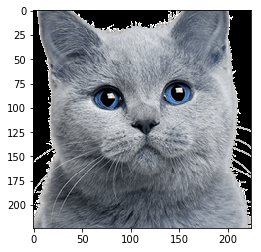

In [2]:
ori_img = cv2.imread(r'C:\DL\image\cat_blue.png')
plt.imshow(ori_img)
# what does the image look like?
print ori_img.shape, ori_img.shape[0], ori_img.shape[1], ori_img.shape[2]

In [3]:
img = np.expand_dims(ori_img, axis=-1)
print img.shape, img.shape[0], img.shape[1], img.shape[2]

(224L, 224L, 3L, 1L) 224 224 3


(224L, 224L)


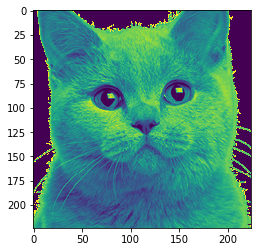

In [4]:
img_gray = np.dot(ori_img[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img_gray)
print img_gray.shape

## Load the existed models

In [5]:
model = vgg16.VGG16(weights='imagenet', include_top=True)
# plot_model(model, to_file='model.png', show_shapes=True)
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 224, 224)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0         
__________

In [6]:
# Get the symbolic outputs of each "key" layer (we gave them unique names).
model_input = model.input
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_name = "block5_conv3"
assert layer_name in layer_dict.keys(), 'Layer ' + layer_name + ' not found in model.'
layer_output = layer_dict[layer_name].output
layer_weights = layer_dict[layer_name].get_weights()
print "layer_output", layer_output
print "layer_weights", layer_weights[0].shape, layer_weights[1].shape, layer_weights[0].shape[3]

layer_output Elemwise{mul,no_inplace}.0
layer_weights (3L, 3L, 512L, 512L) (512L,) 512


In [7]:
input_batch = kvu.pre_process_one_batch(img)

adjust_shape_to_model -> channels_first (3L, 224L, 224L)
input_batch.shape (1L, 3L, 224L, 224L)


## Make the prediction for final output

In [8]:
output_category = model.predict(input_batch)
print "output_category.shape", output_category.shape
print output_category.argmax(), output_category.argmax(axis=-1)

output_category.shape (1L, 1000L)
669 [669]


## Make the prediction for layer output

In [9]:
intermediate_layer_model = Model(inputs=model.input, outputs=layer_output)
output_batch = intermediate_layer_model.predict(input_batch)
print "output_batch.shape", output_batch.shape

output_batch.shape (1L, 512L, 14L, 14L)


In [10]:
get_layer_output = K.function([model_input], [layer_output])
output_batch = get_layer_output([input_batch])[0]
print "output_batch.shape", output_batch.shape

output_batch.shape (1L, 512L, 14L, 14L)


In [11]:
img_features = kvu.post_process_one_batch(output_batch, img)

output_batch.shape (1L, 512L, 14L, 14L)
adjust_shape_to_show -> channels_first (14L, 14L, 512L)
img.shape (14L, 14L, 512L)


Visualize weights. Layers Features 512, Dim 512, Size 3*3
Layer Weights: 0 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


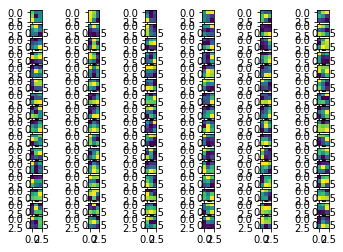

Layer Weights: 1 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


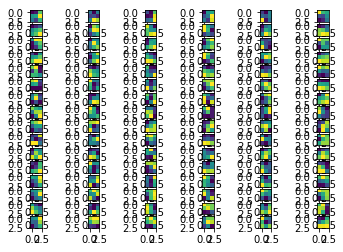

Layer Weights: 2 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


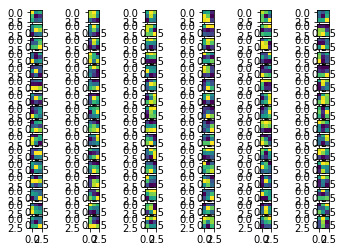

Layer Weights: 3 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


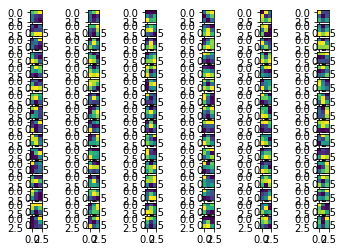

Layer Weights: 4 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


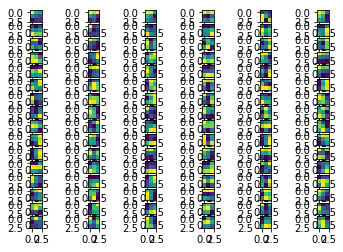

Layer Weights: 5 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


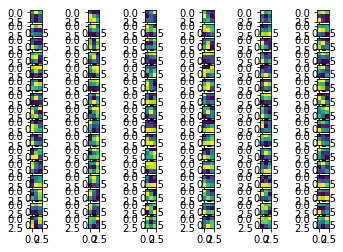

Layer Weights: 6 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


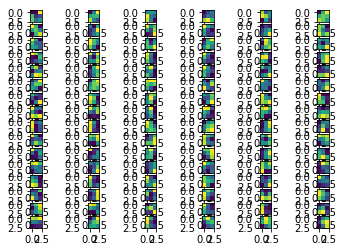

Layer Weights: 7 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


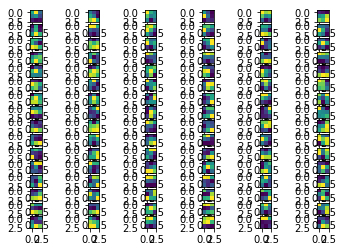

Layer Weights: 8 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


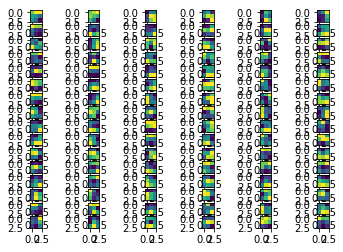

Layer Weights: 9 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


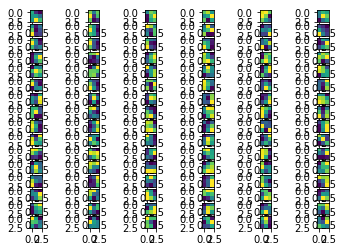

Layer Weights: 10 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


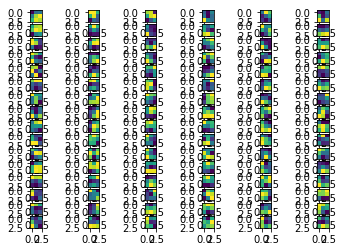

Layer Weights: 11 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


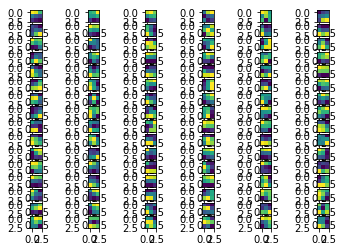

Layer Weights: 12 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


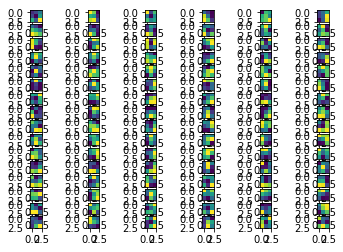

Layer Weights: 13 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


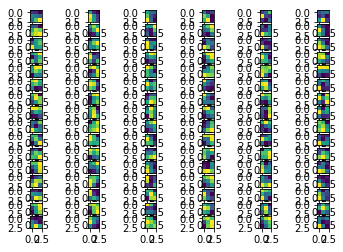

Layer Weights: 14 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


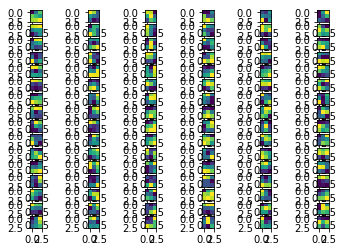

Layer Weights: 15 (3L, 3L, 512L)
Visualize image. Feature maps 512, Size 3*3
Visualize image in flat mdoe. Flat : 512
img_data.shape (3L, 3L, 512L) 3


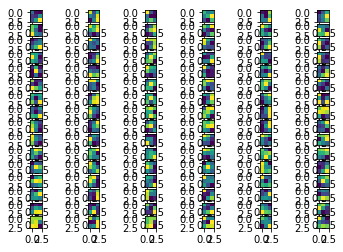

In [12]:
kvu.visualize_layer_weights(layer_weights, bFlat=True)

Visualize image. Feature maps 512, Size 14*14
Visualize image in overlay mdoe. Overlay : 512
img_data.shape (14L, 14L, 512L) 3


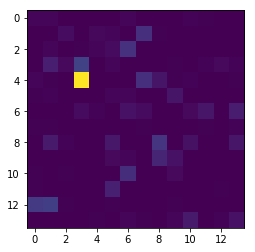

In [12]:
kvu.visualize_img(img_features)

Visualize image in flat mdoe. Flat : 512
img_data.shape (14L, 14L, 512L) 3


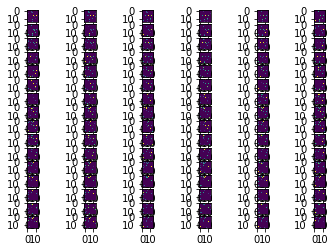

In [13]:
kvu.visualize_in_flat(img_features)